In [1]:
import torch
import torchvision 
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

In [3]:
train_data_with_teacher_labels = torchvision.datasets.CIFAR10(root="./data", train=True, download=True,transform=transform)
train_data_loader = torch.utils.data.DataLoader(train_data_with_teacher_labels, batch_size=4, shuffle=True,num_workers=2)

test_data_with_teacher_labels = torchvision.datasets.CIFAR10(root="./data", train=False, download=True,transform=transform)
test_data_loader = torch.utils.data.DataLoader(test_data_with_teacher_labels, batch_size=4, shuffle=True,num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
class_names = ("plane","car","bird","cat","deer","dog","frog","horse","ship","truck")

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

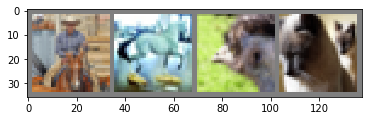

horse horse  bird   cat


In [6]:
data_iterator = iter(train_data_loader)
images,labels = data_iterator.next()
show_image(torchvision.utils.make_grid(images))
print(" ".join('%5s'% class_names[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = CNN()

In [8]:
import torch.optim as optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optimizer.SGD(model.parameters(),lr=0.001,momentum=0.9)

In [9]:
MAX_EPOCH = 3
for epoch in range(MAX_EPOCH):
    total_loss = 0.0
    for i,data in enumerate(train_data_loader,0):
        train_data,teacher_labels = data
        
        optimizer.zero_grad()
        
        outputs = model(train_data)
        
        loss = criterion(outputs, teacher_labels)
        loss.backward()
        
        optimizer.step()
        
        total_loss += loss.item()
        
        if i%2000 == 1999:
            print("学習進歩:[%d,%5d] loss:%.3f" % (epoch+1, i+1, total_loss/2000))
            total_loss = 0.0
print("学習完了")

学習進歩:[1, 2000] loss:2.238
学習進歩:[1, 4000] loss:1.926
学習進歩:[1, 6000] loss:1.724
学習進歩:[1, 8000] loss:1.598
学習進歩:[1,10000] loss:1.539
学習進歩:[1,12000] loss:1.474
学習進歩:[2, 2000] loss:1.416
学習進歩:[2, 4000] loss:1.372
学習進歩:[2, 6000] loss:1.331
学習進歩:[2, 8000] loss:1.356
学習進歩:[2,10000] loss:1.341
学習進歩:[2,12000] loss:1.302
学習進歩:[3, 2000] loss:1.219
学習進歩:[3, 4000] loss:1.224
学習進歩:[3, 6000] loss:1.228
学習進歩:[3, 8000] loss:1.219
学習進歩:[3,10000] loss:1.196
学習進歩:[3,12000] loss:1.197
学習完了


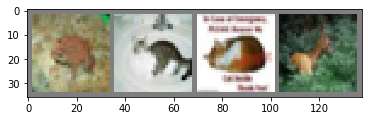

正解教師ラベル：  frog  cat  cat deer


In [14]:
data_iterator = iter(test_data_loader)
images,labels = data_iterator.next()

show_image(torchvision.utils.make_grid(images))
print("正解教師ラベル：","".join("%5s" % class_names[labels[j]] for j in range(4)))

In [ ]:
_,predicted = torch.mac(outputs,1)
print("予測")